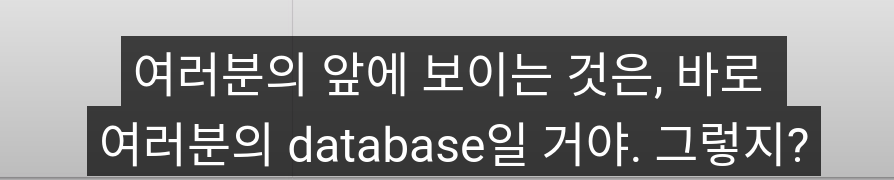

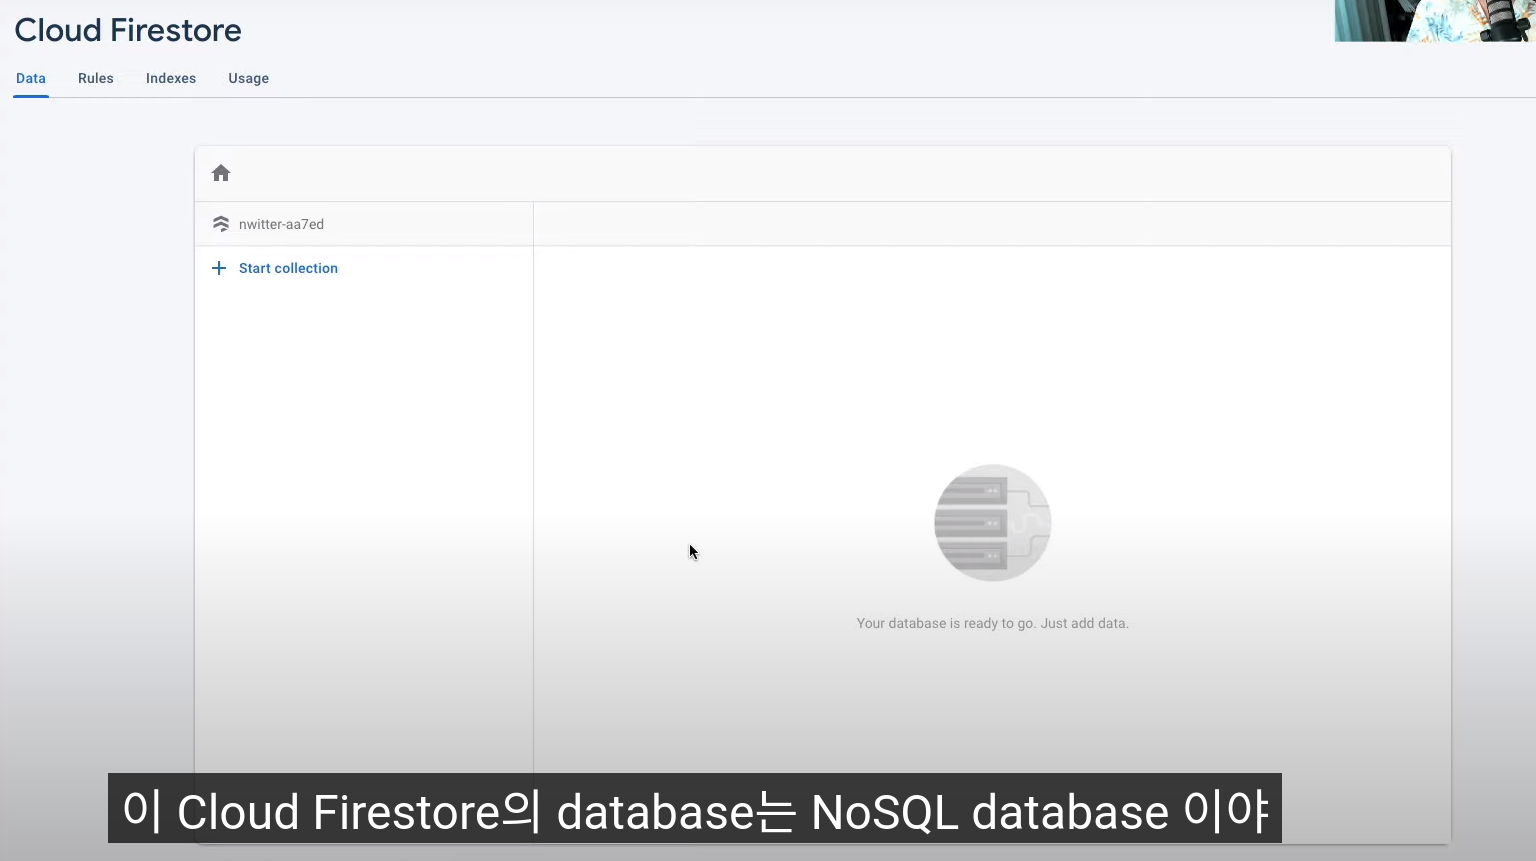

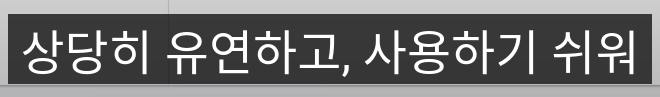

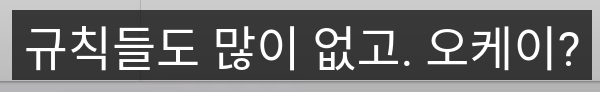

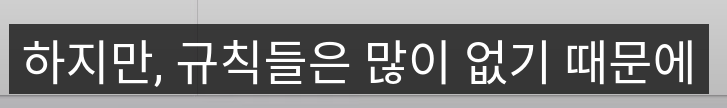

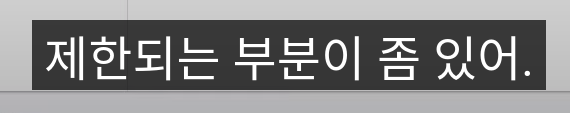

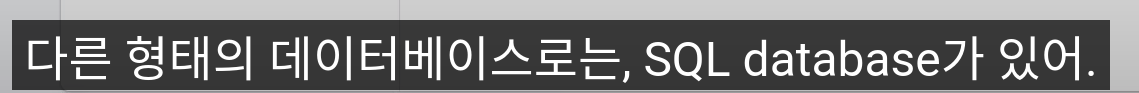

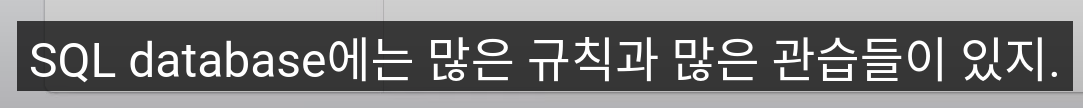

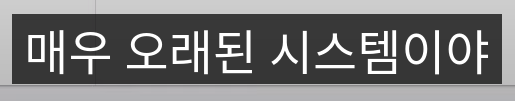

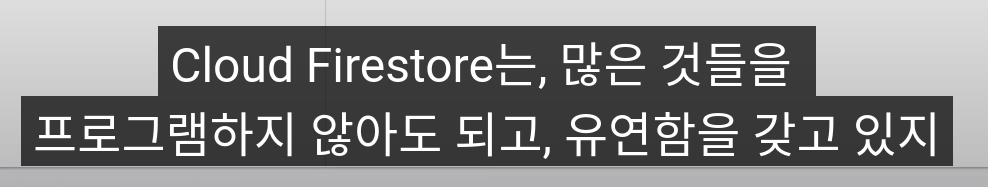

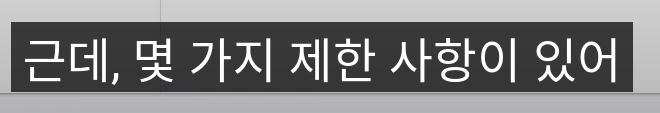

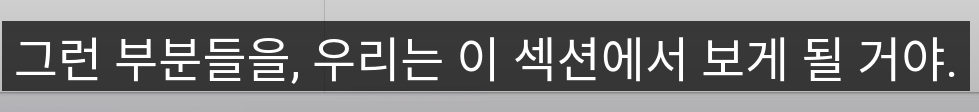

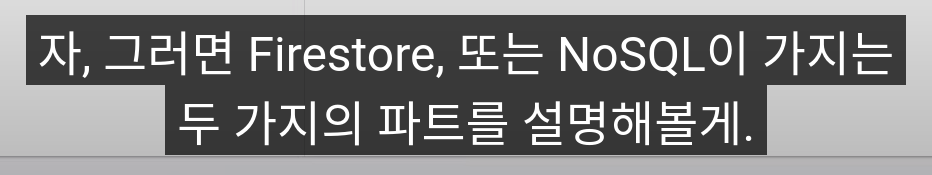

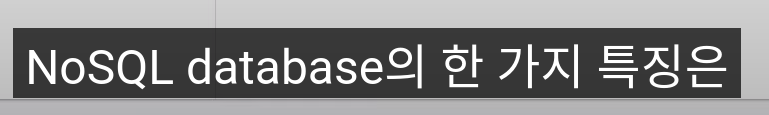

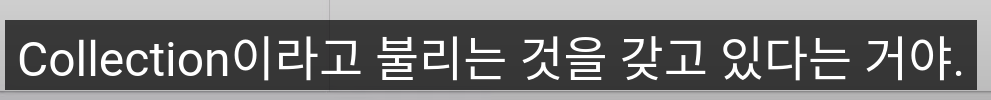

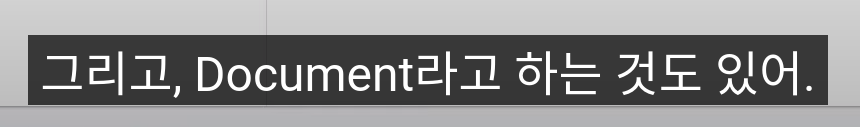

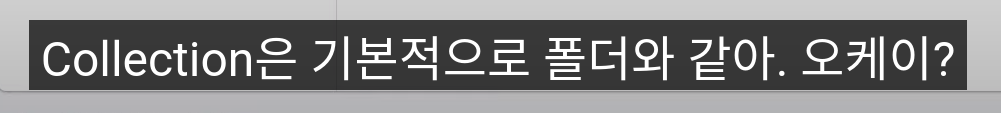

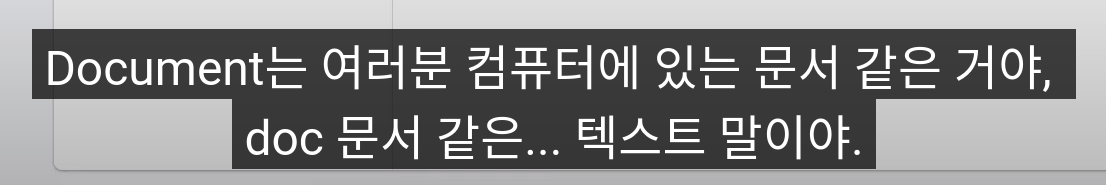

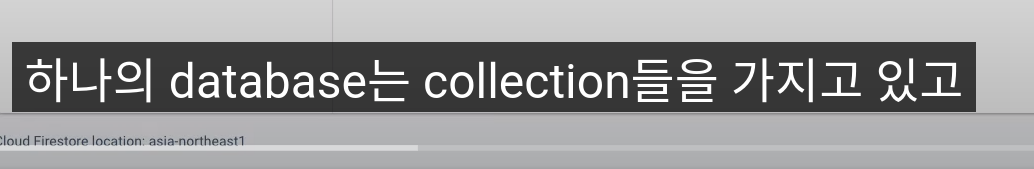

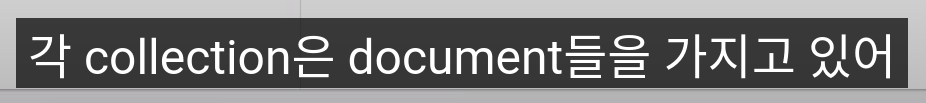

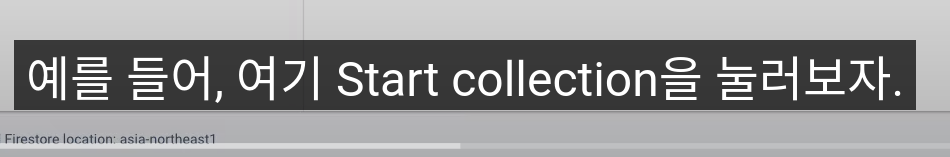

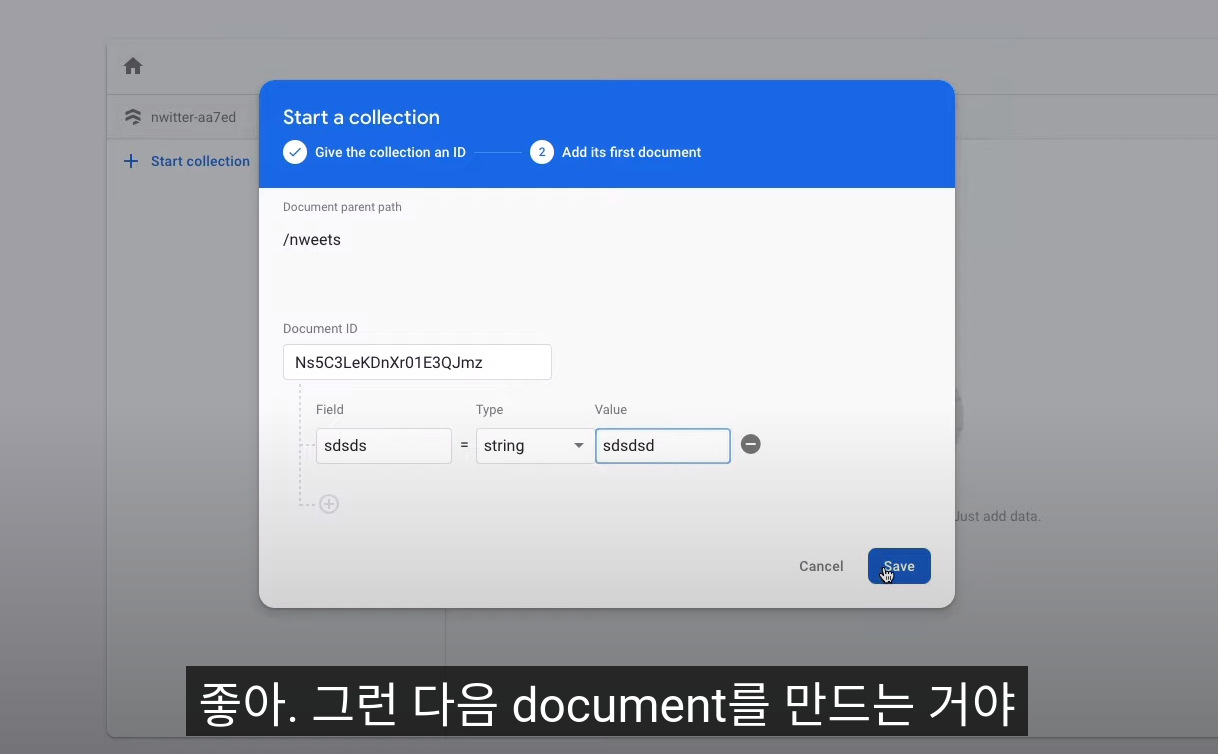

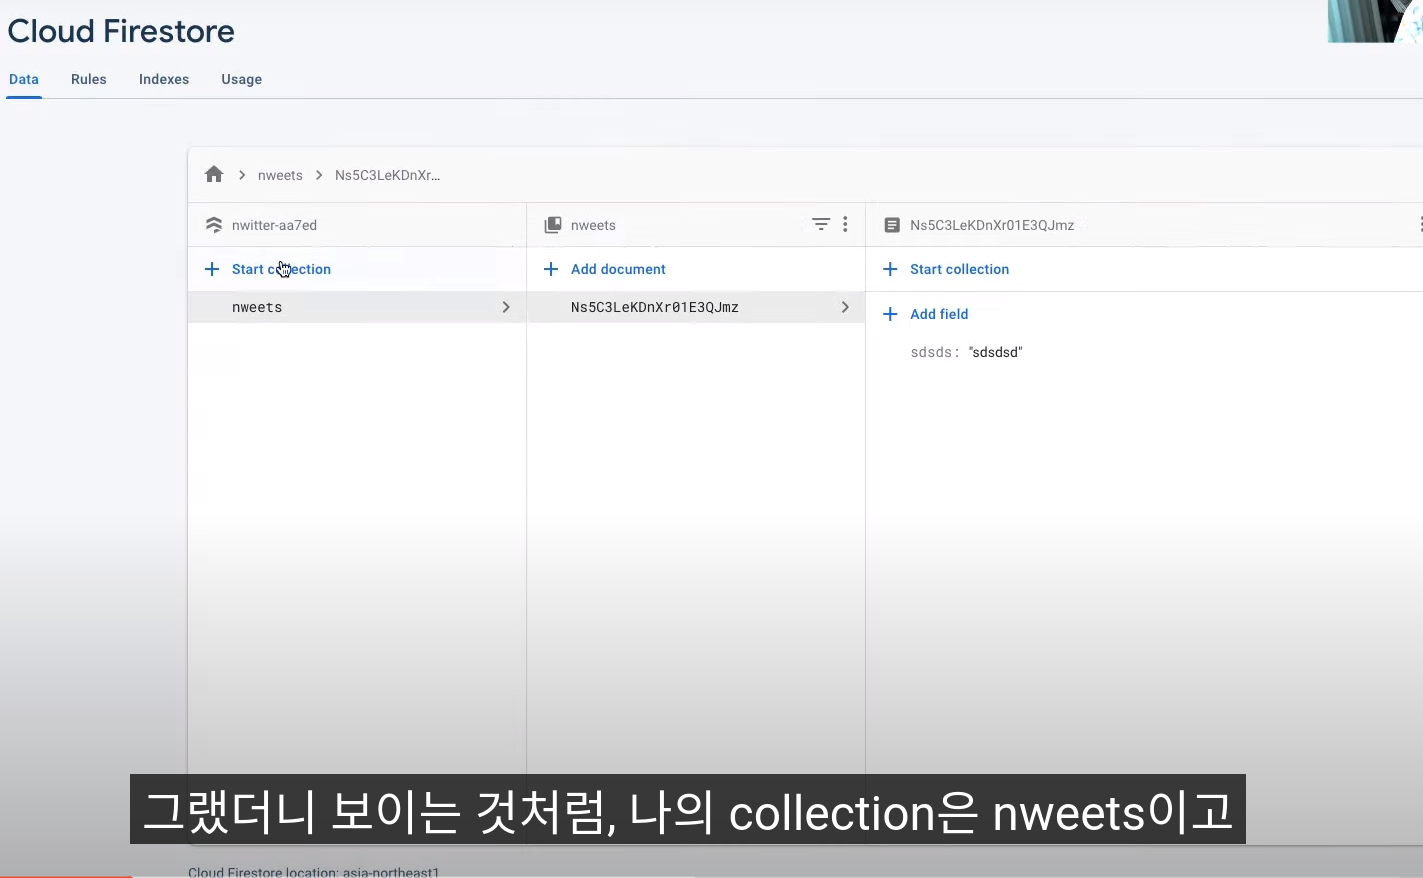

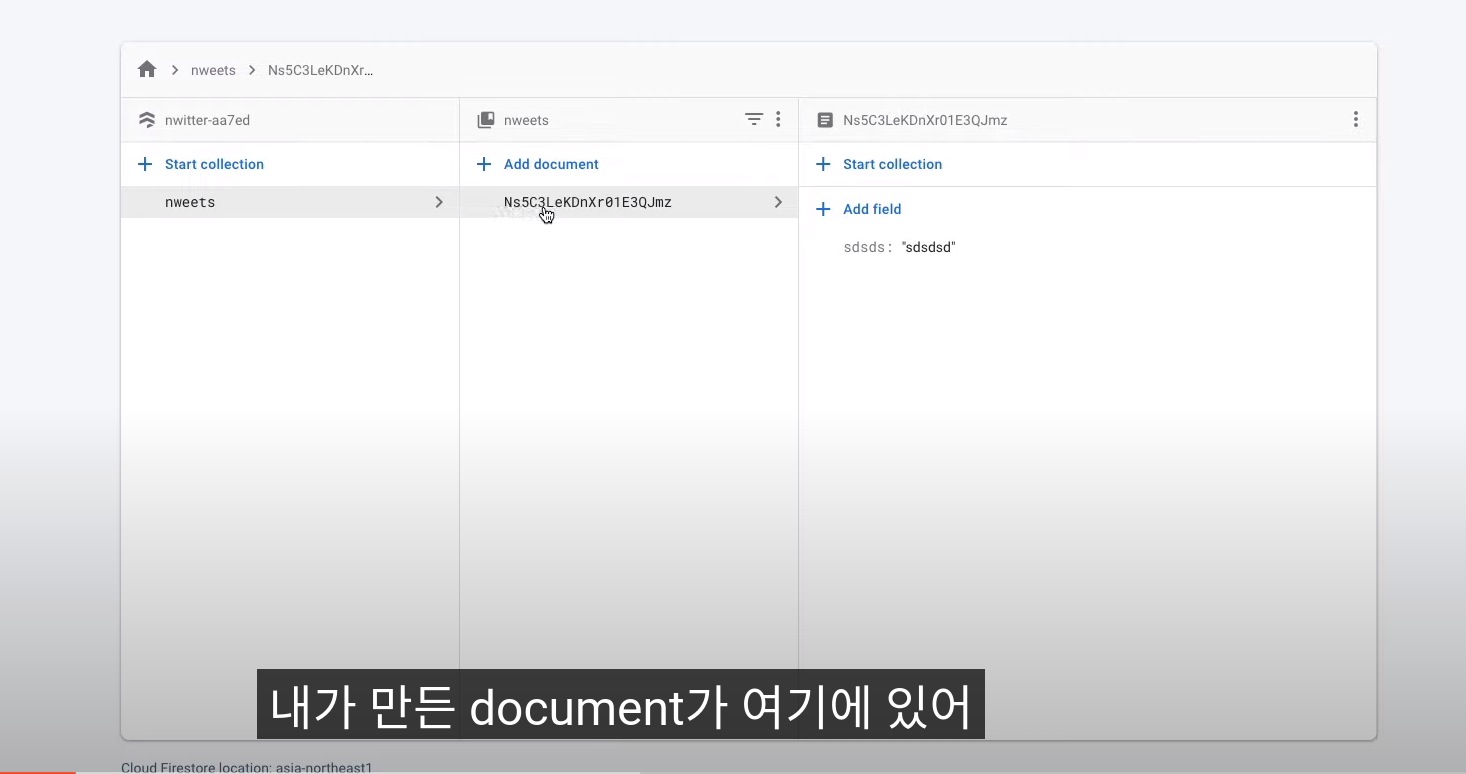

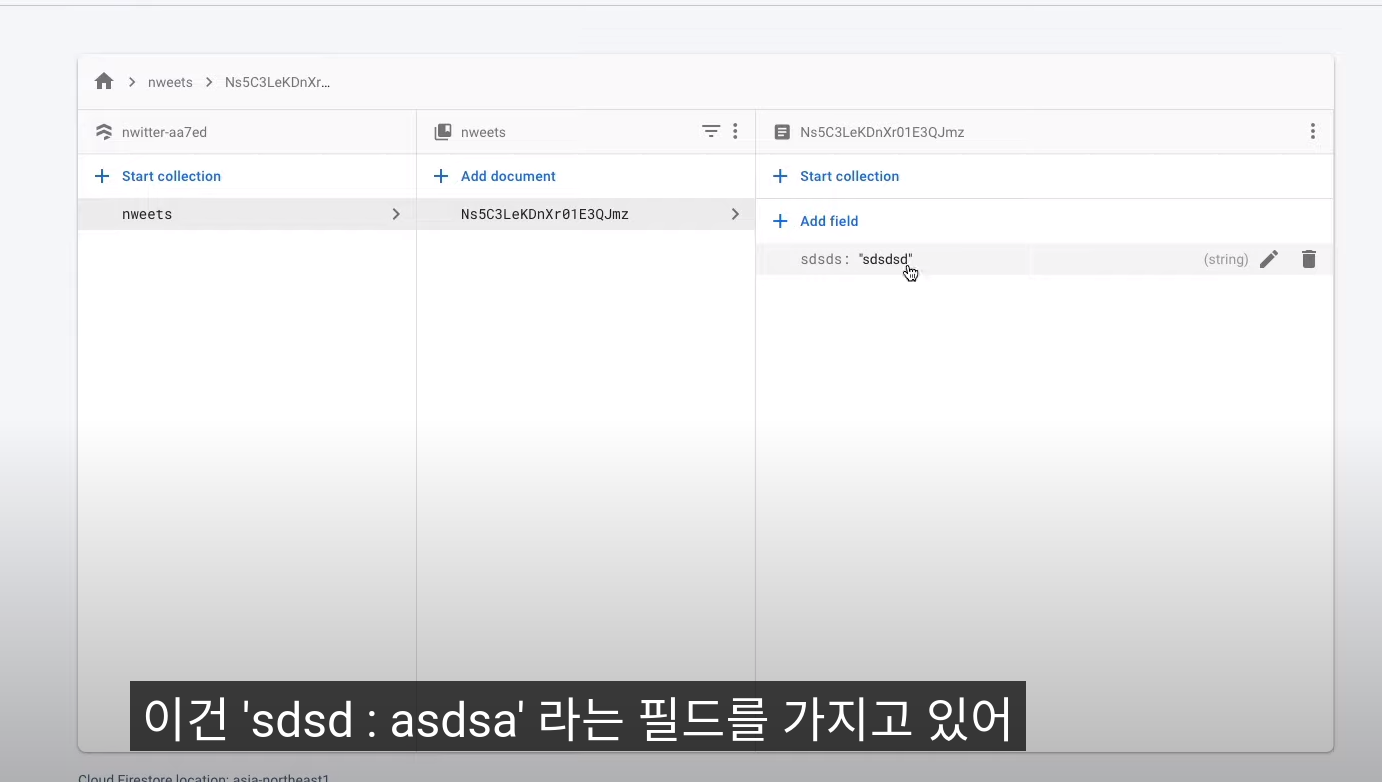

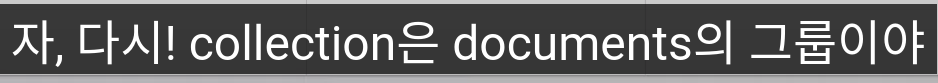

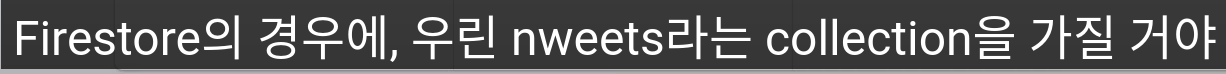

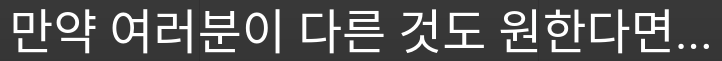

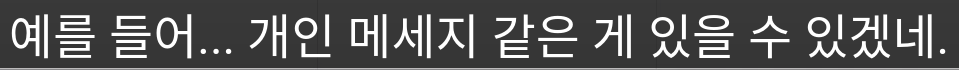

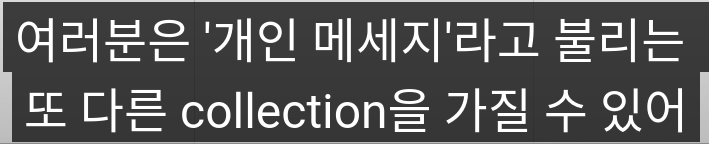

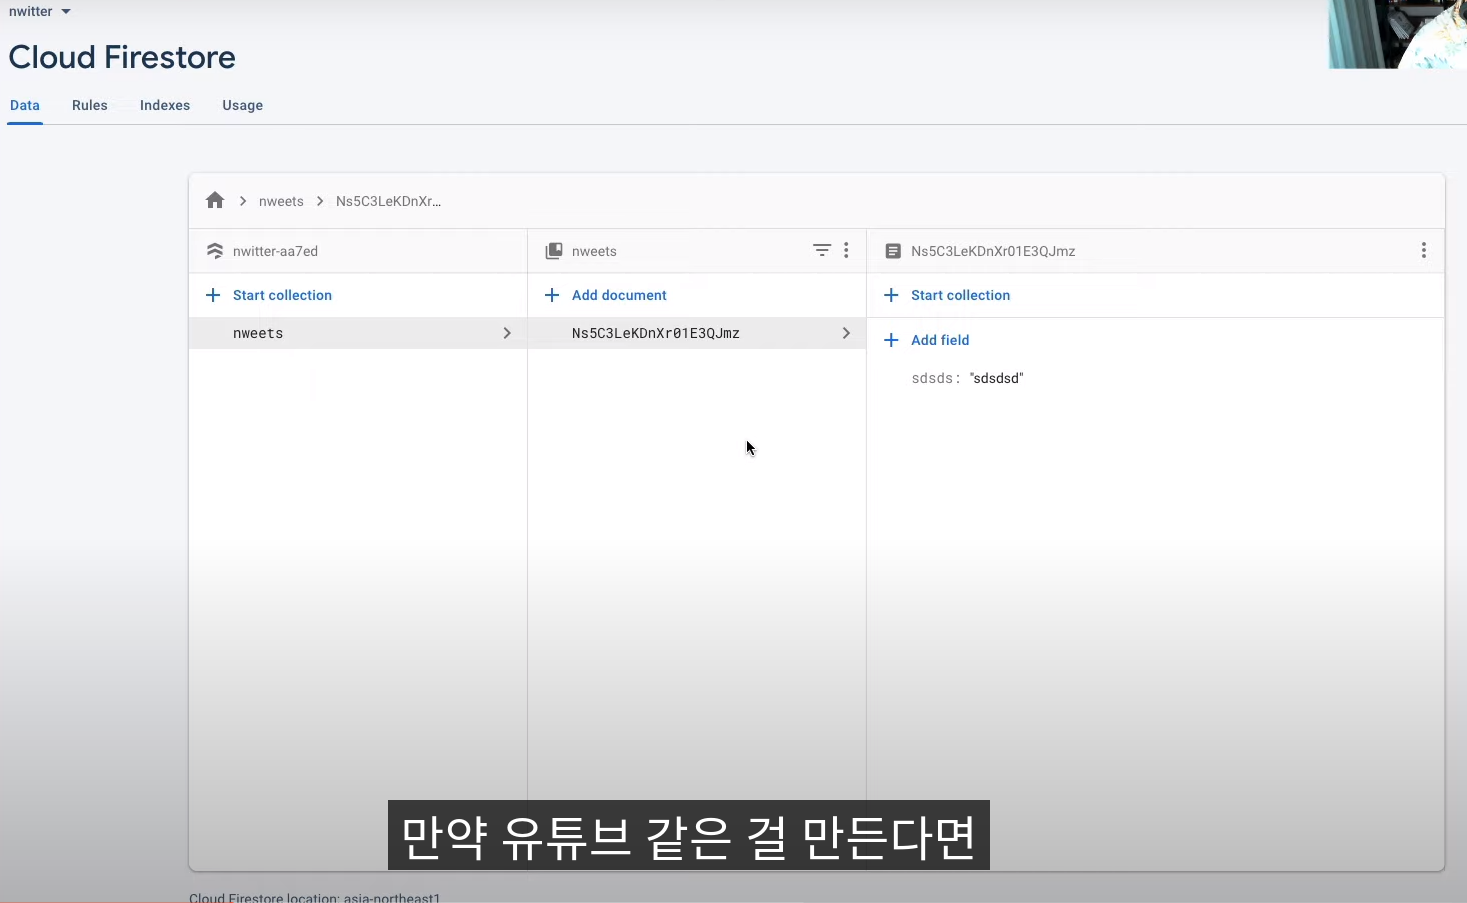

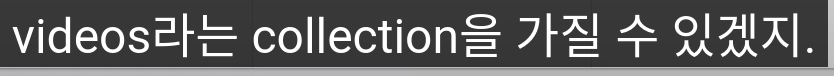

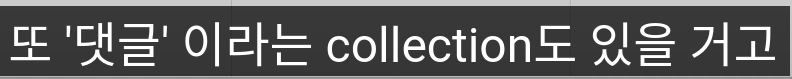

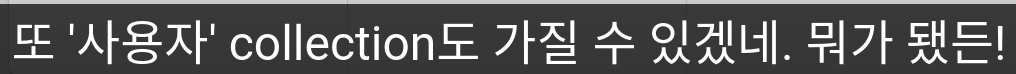

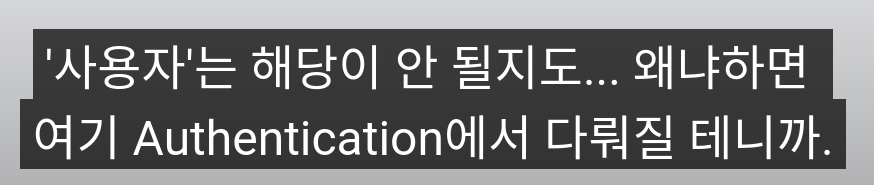

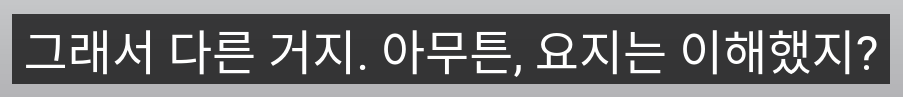

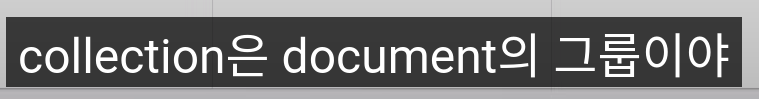

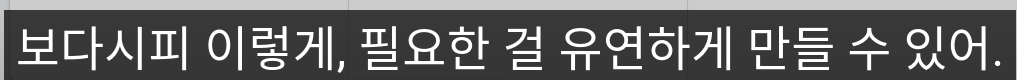

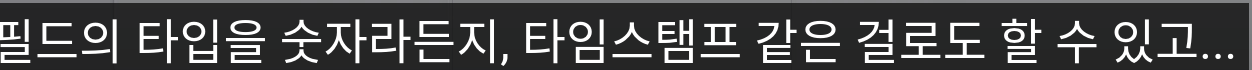

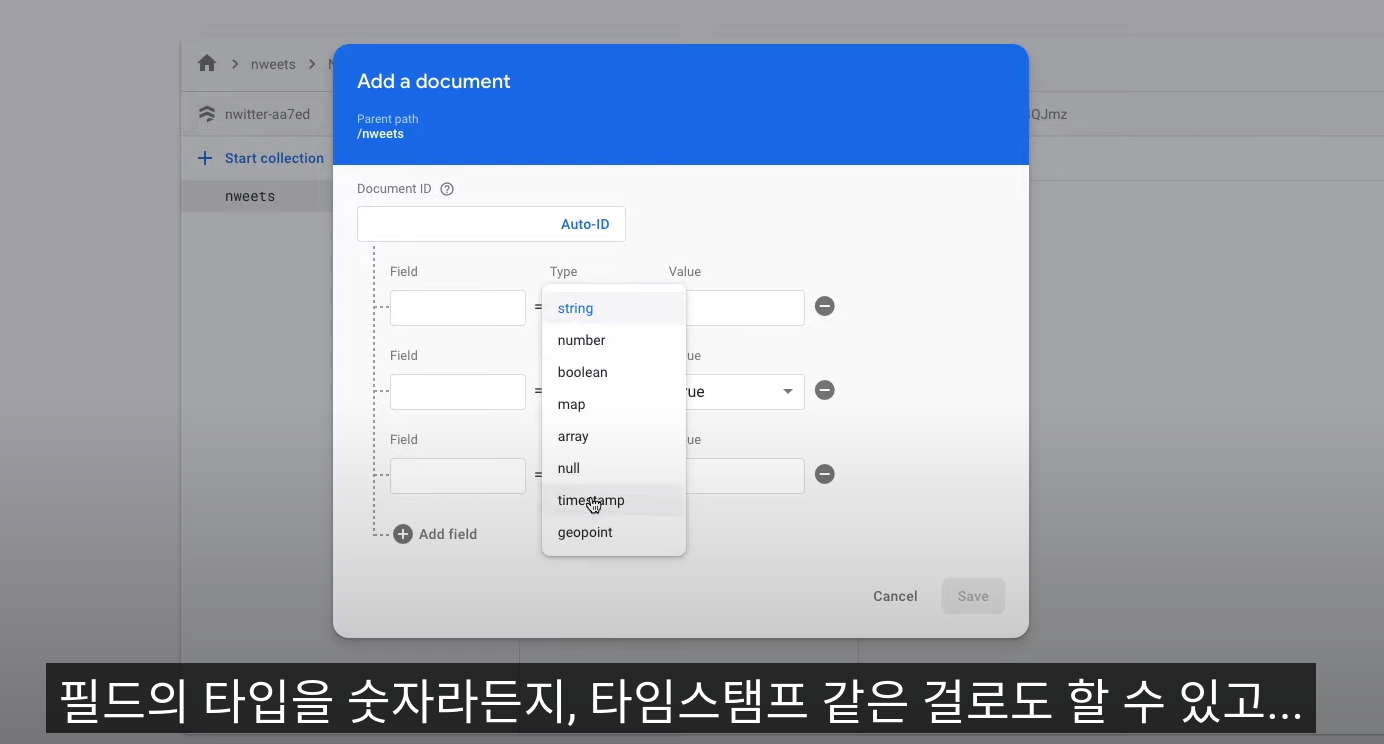

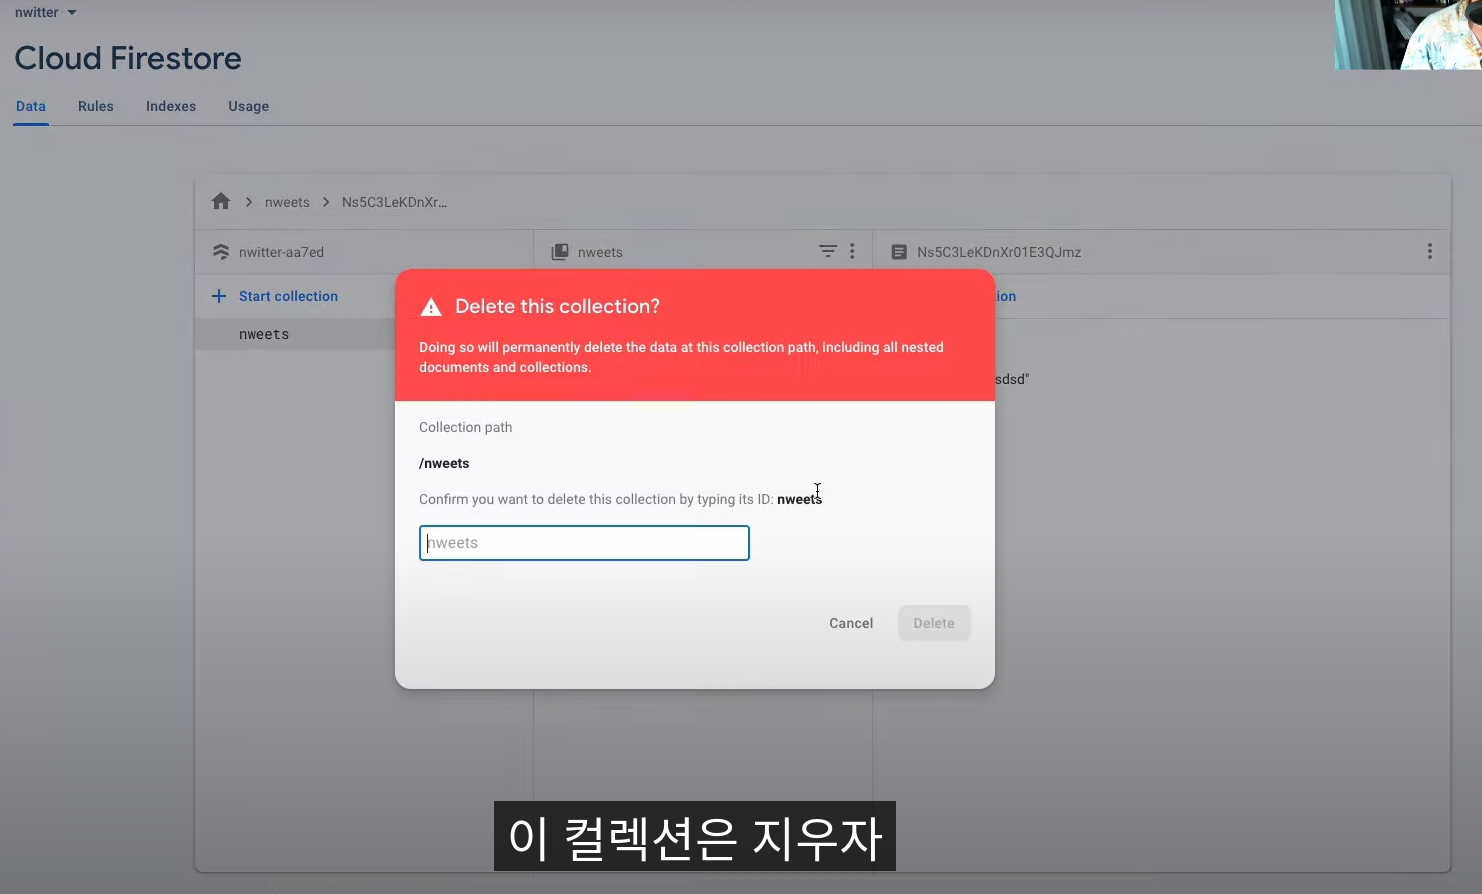

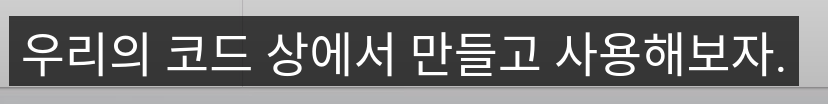

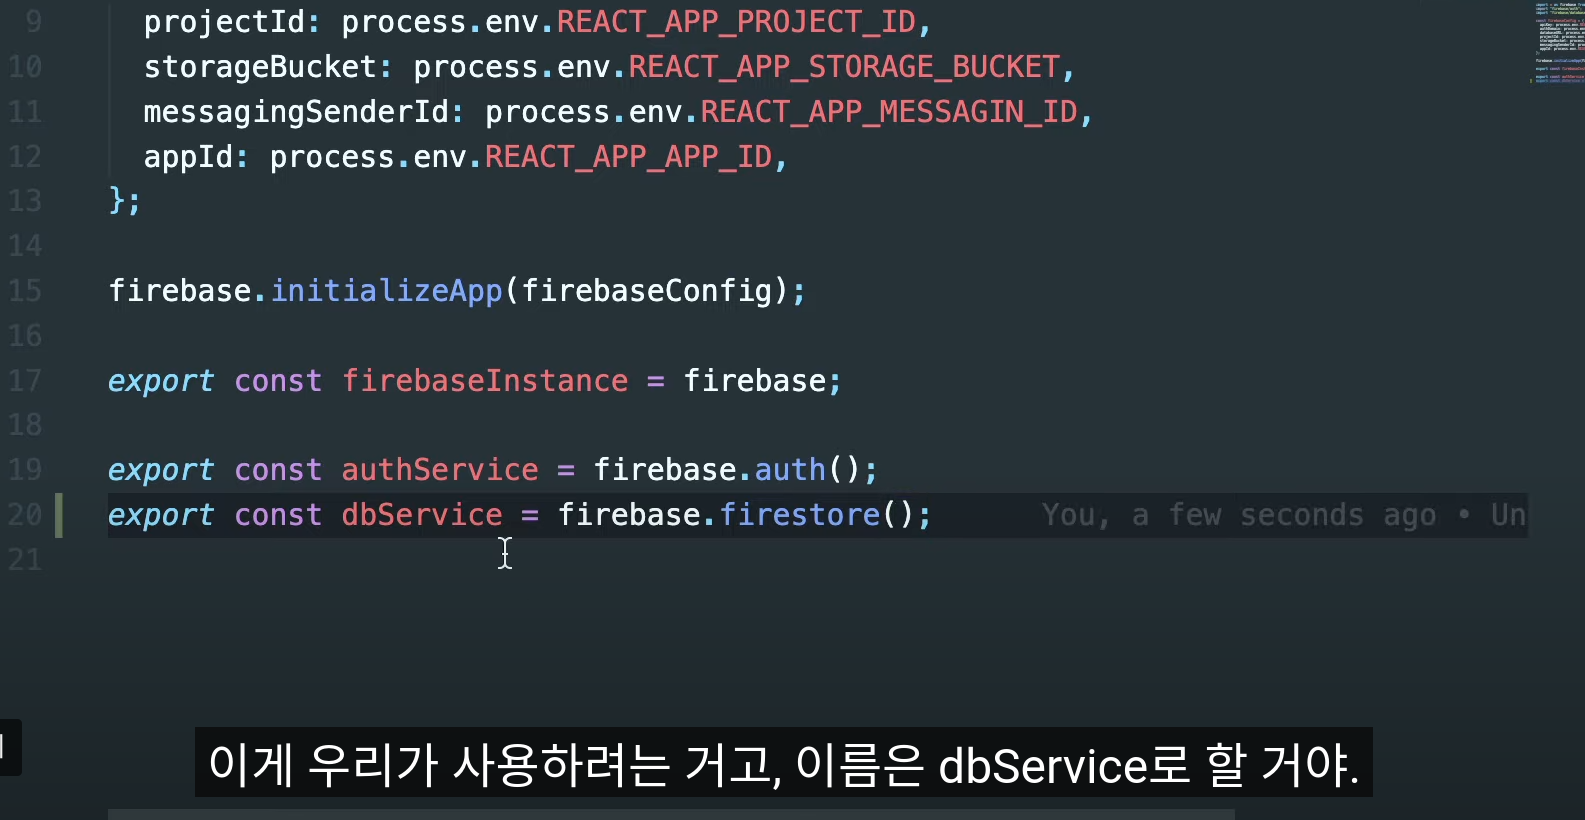

# fbase.js - web9
```jsx 
// ref
// https://firebase.google.com/docs/auth/web/start?hl=ko&authuser=1

import { initializeApp } from "firebase/app";
import { getAuth } from "firebase/auth";

// ref getFirestore https://firebase.google.com/docs/firestore/quickstart?hl=ko#web-version-9
import { getFirestore } from "firebase/firestore";

// Your web app's Firebase configuration
const firebaseConfig = {
  apiKey: process.env.REACT_APP_API_KEY,
  authDomain: process.env.REACT_APP_AUTH_DOMAIN,
  projectId: process.env.REACT_APP_PROJECT_ID,
  storageBucket: process.env.REACT_APP_STORAGE_BUCKET,
  messagingSenderId: process.env.REACT_APP_MESSAGING_SENDER_ID,
  appId: process.env.REACT_APP_APP_ID,
};

// Initialize Firebase
const app = initializeApp(firebaseConfig);

export const authService = getAuth(app);

// Initialize Cloud Firestore and get a reference to the service
export const dbService = getFirestore(app);

```

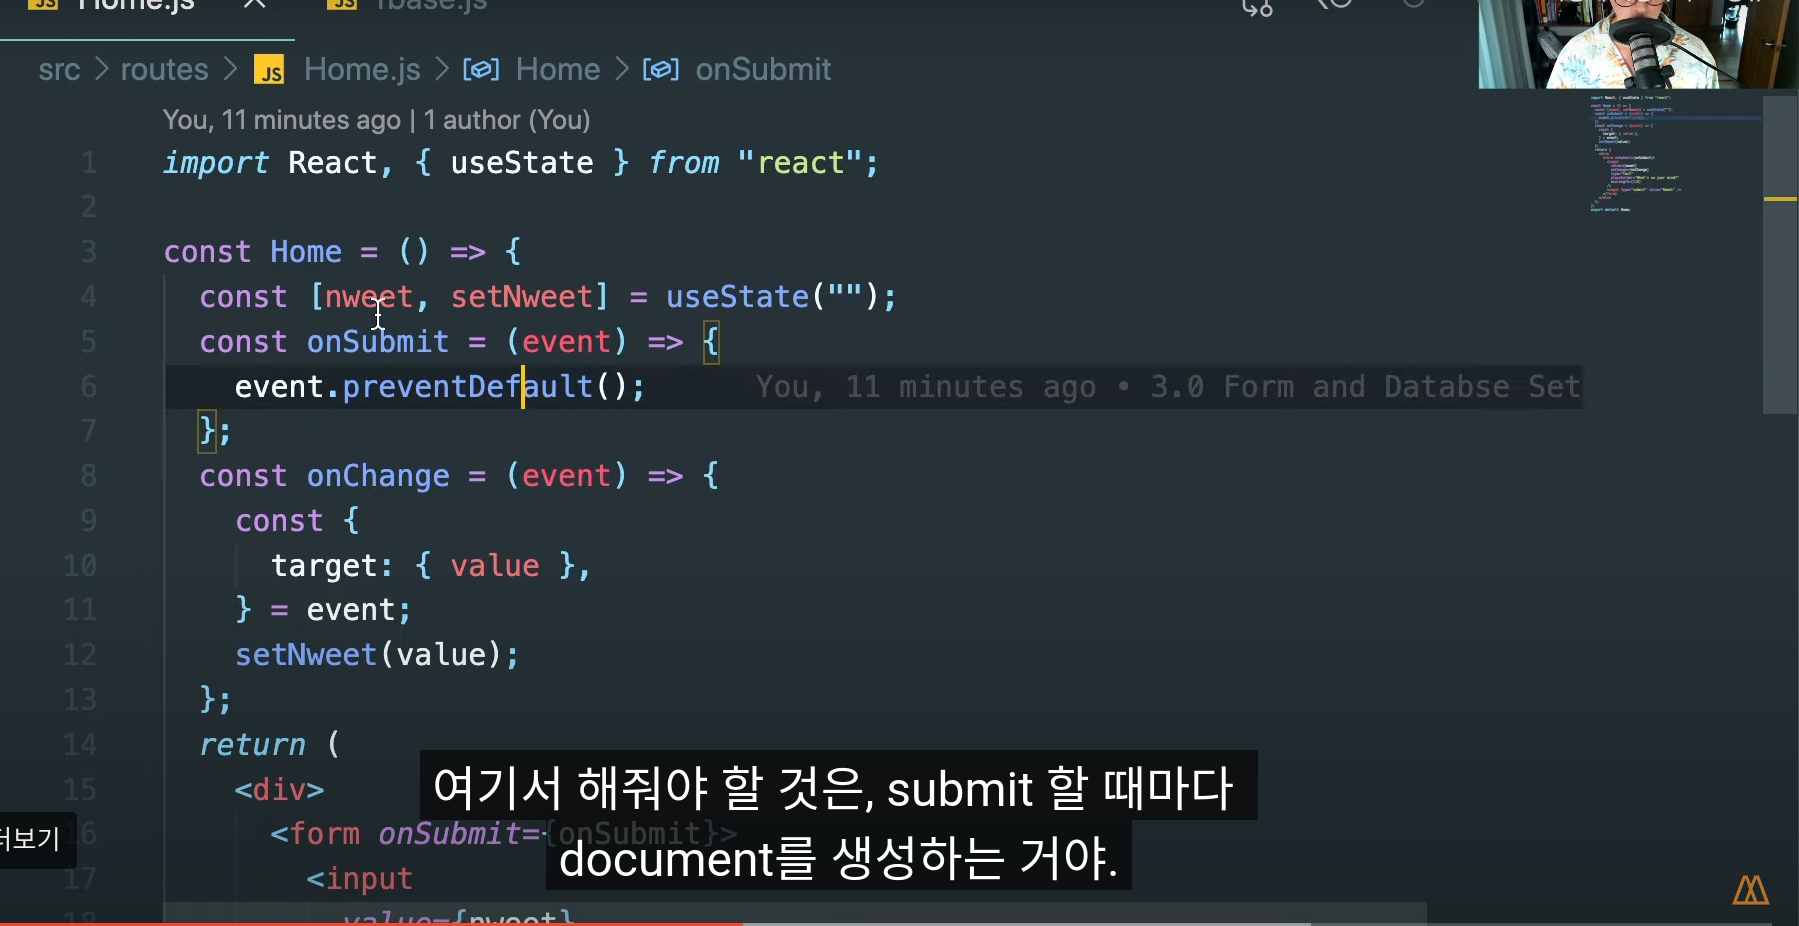

# Home.js
```jsx
import { useState } from "react";

// firestore - https://firebase.google.com/docs/firestore/quickstart?hl=ko#web-version-9
import { collection, addDoc } from "firebase/firestore";
import { dbService } from "fbase";

function Home() {
  const [jweet, setJweet] = useState("");

  const onSubmit = async (event) => {
    event.preventDefault();
    if (!jweet) {
      return;
    }
    // DB
    try {
      const docRef = await addDoc(collection(dbService, "jweets"), {
        jweet,
        createdAt: Date.now(),
      });
      console.log("Document written with ID :", docRef.id);
    } catch (error) {
      console.log(error.message);
    }
    setJweet("");
  };
  const onChange = (event) => {
    const {
      target: { value },
    } = event;
    setJweet(value);
  };

  return (
    <>
      <form onSubmit={onSubmit}>
        <input
          type="text"
          placeholder="What's on your mind?"
          maxLength={120}
          onChange={onChange}
          value={jweet}
        />
        <input type="submit" value="Jweet" />
      </form>
    </>
  );
}

export default Home;

```

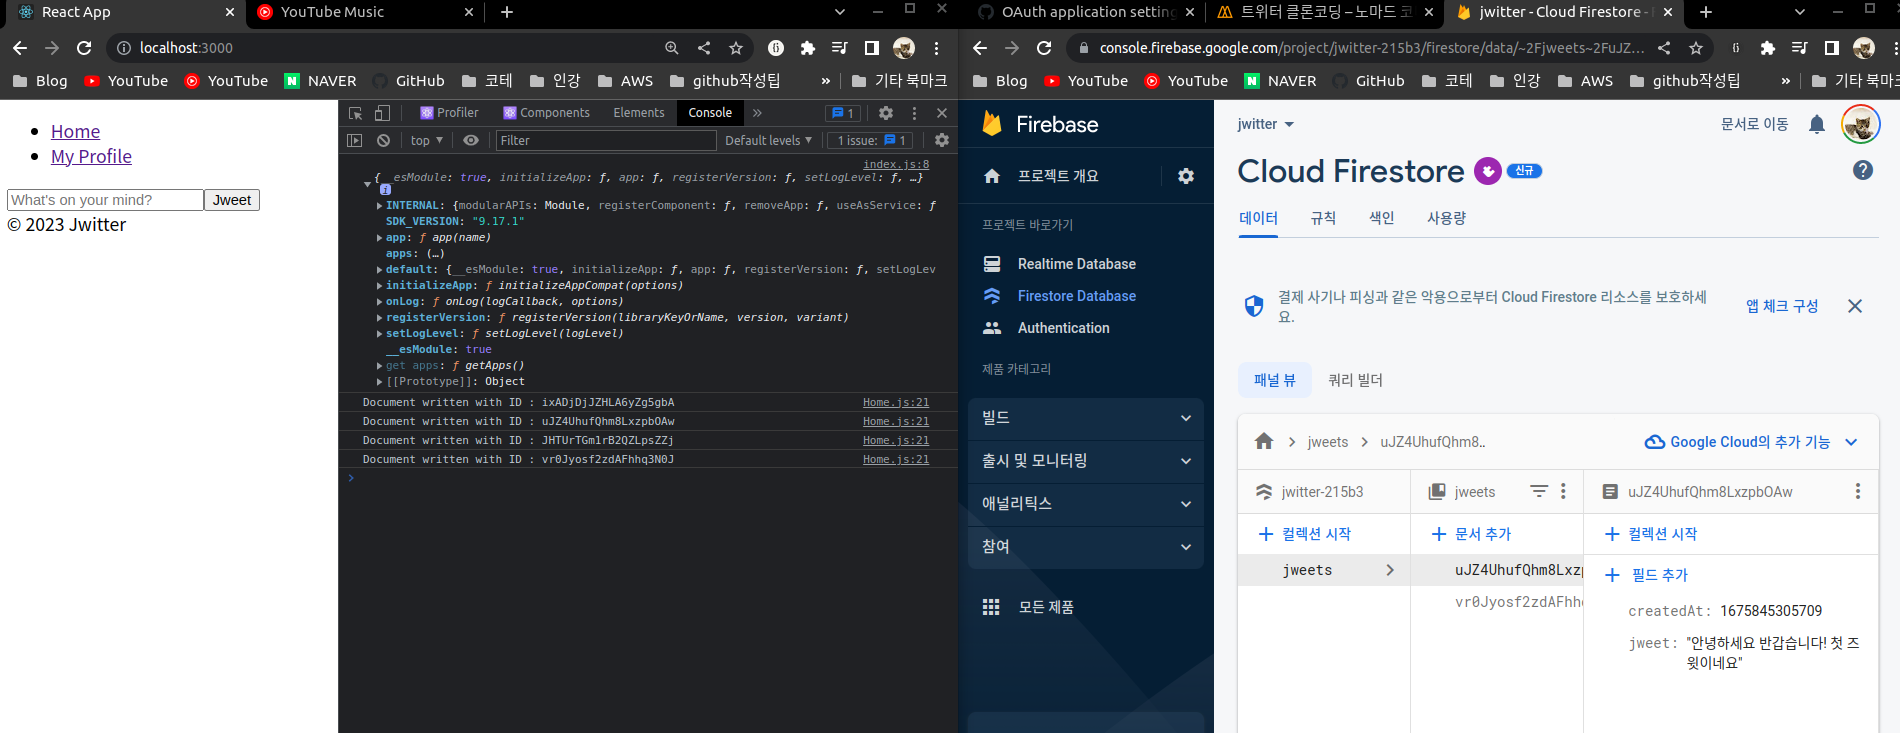

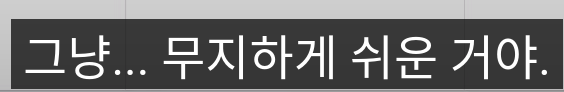